In [1]:
# from thequickmath.reduced_models.models import MoehlisFaisstEckhardtModel, rk4_timestepping
from models import MoehlisFaisstEckhardtModel, rk4_timestepping

from deeptime.clustering import KMeans, RegularSpace
import deeptime.markov as markov
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import math
import time

In [4]:
def random_initial_conditions(m_size):
    ic = np.zeros(m_size)
    ic[0] = np.random.uniform(0, 0.05)
    ic[1:8] = np.random.uniform(-0.05, 0.05, size=m_size-2)
    ic[8] = np.random.uniform(-0.05, 0)
    return ic

def generate_trajectory(model, time_step, n_steps):
    start_time = time.time()
    ic = random_initial_conditions(model.dim)
    trajectory = rk4_timestepping(model, ic, time_step, n_steps, time_skip = 1000, debug = False)
    print("%s seconds" % (time.time() - start_time))
    return trajectory[:-1:]

def show_energy(trajectory, label):
    ek = model.kinetic_energy(trajectory)
    if label:
        plt.plot(np.arange(len(trajectory)), ek, linewidth=0.7, color = label, markersize = 0.5)
    else:
        plt.plot(np.arange(len(trajectory)), ek,  linewidth=1, markersize = 0.5)
    plt.xlabel("$t$")
    plt.ylabel("$E$")

    return ek

In [5]:
Re = 500.0
Lx = 1.75 * np.pi
Lz = 1.2 * np.pi

time_step = 0.001
n_steps = 15000000

In [6]:
model = MoehlisFaisstEckhardtModel(Re, Lx, Lz, [0,0])

In [7]:
trajectory = np.loadtxt('trajectory_for_clustering.txt')

In [8]:
da = np.zeros_like(trajectory)

for i in range(len(trajectory)):
    da[i] = model.f(trajectory[i])

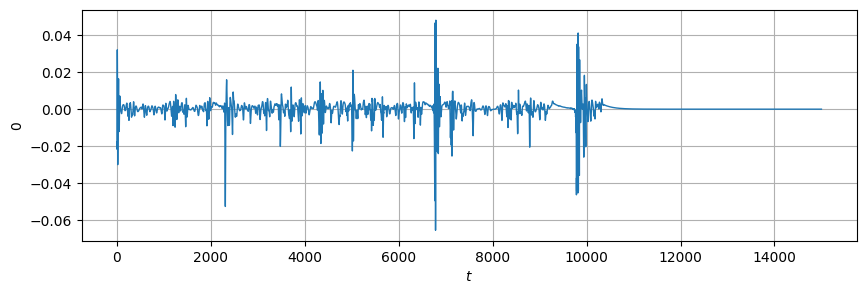

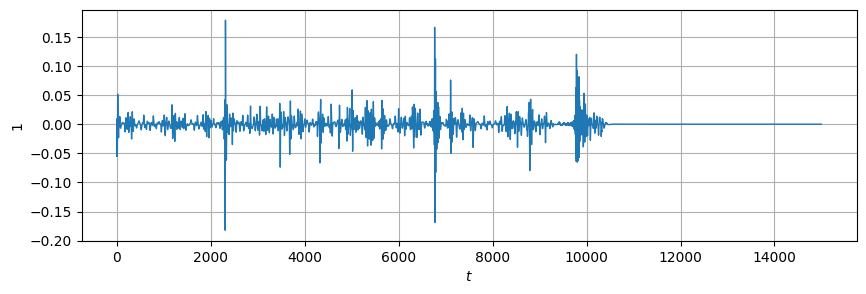

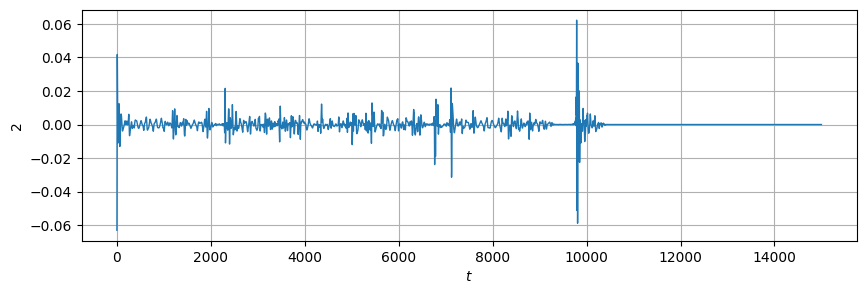

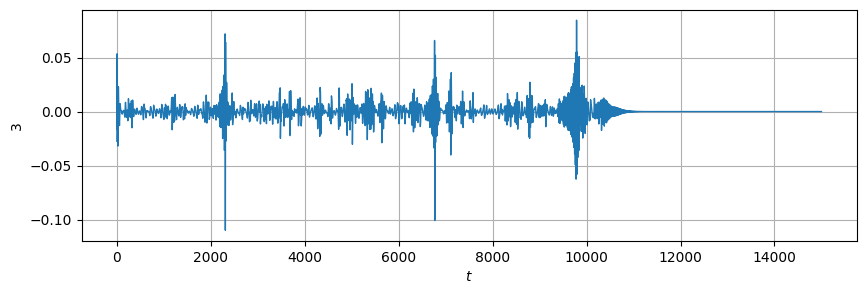

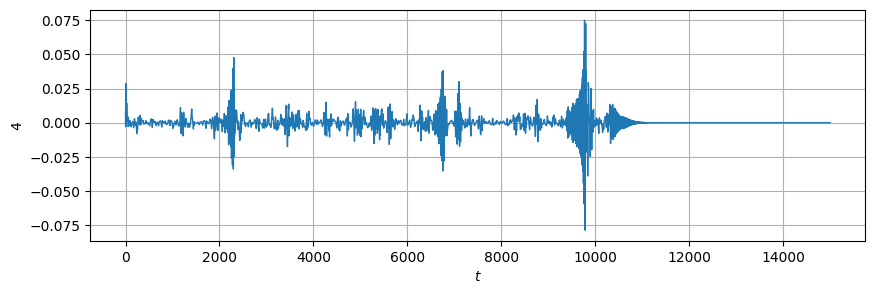

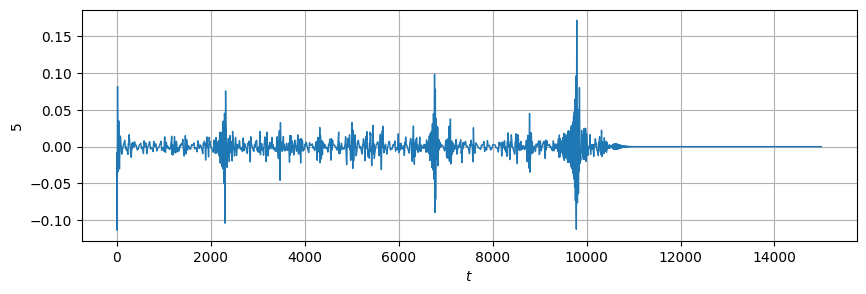

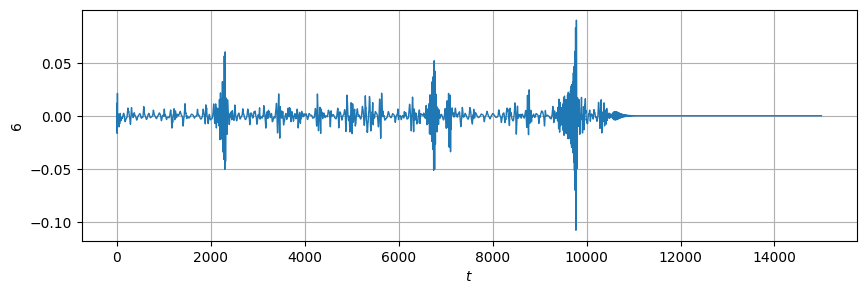

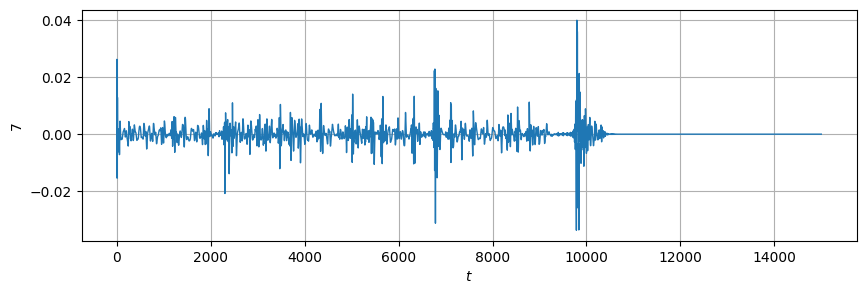

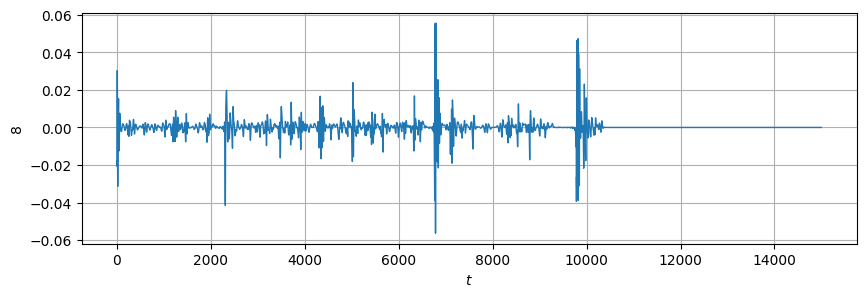

In [9]:
# plt.figure(figsize=(10,3))
da_T = da.T
for i in range(len(da_T)):
    plt.figure(figsize=(10,3))
    plt.plot(np.arange(len(trajectory)), da_T[i],  linewidth=1, markersize = 0.5)
    plt.xlabel("$t$")
    plt.ylabel(i)
#     plt.title(label)
    plt.grid()
    plt.show()

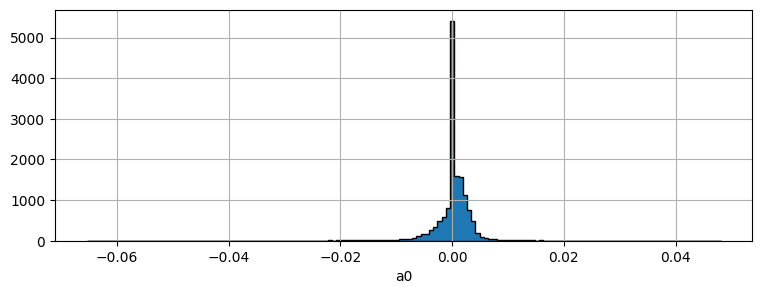

-0.06540574795545785 0.04806884670935986


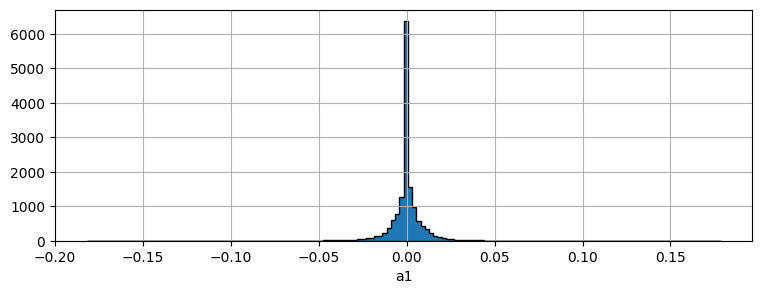

-0.18207857173549696 0.1785153956861224


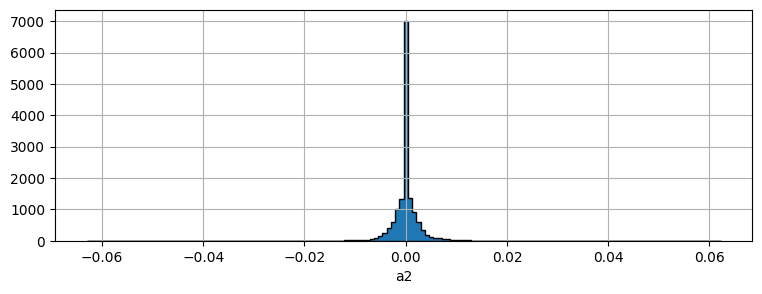

-0.0630462952161189 0.06220752362024476


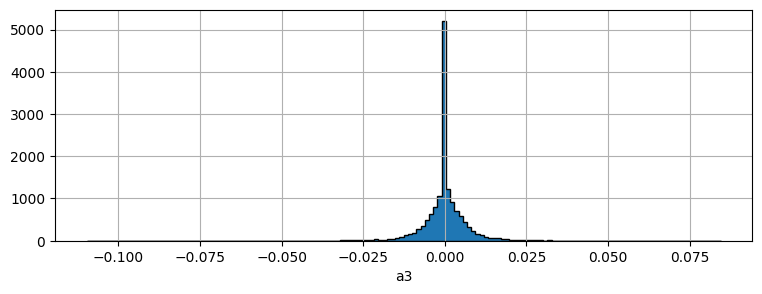

-0.10978596010407779 0.08449959952748543


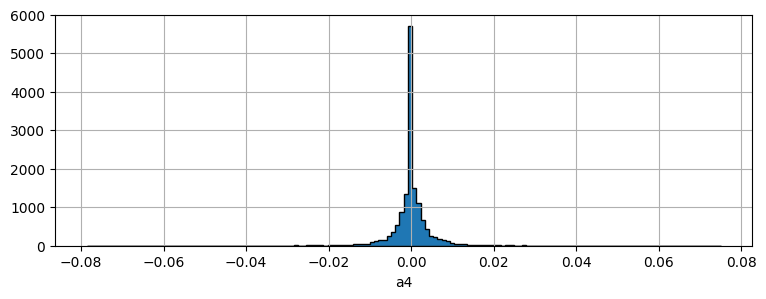

-0.07867651122699842 0.07498366127931455


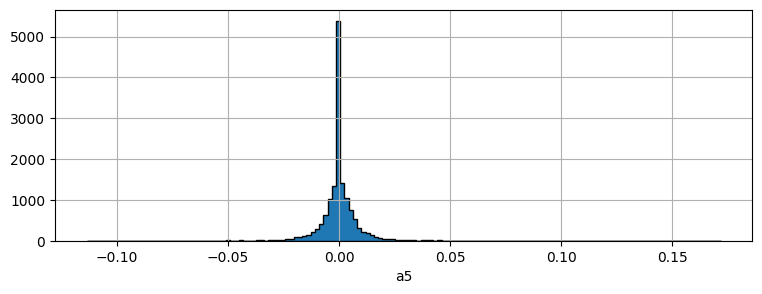

-0.11366669541871488 0.17187976632497487


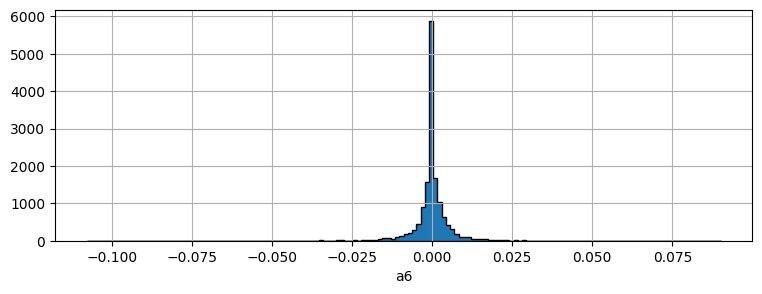

-0.1079271217326731 0.09008032596017389


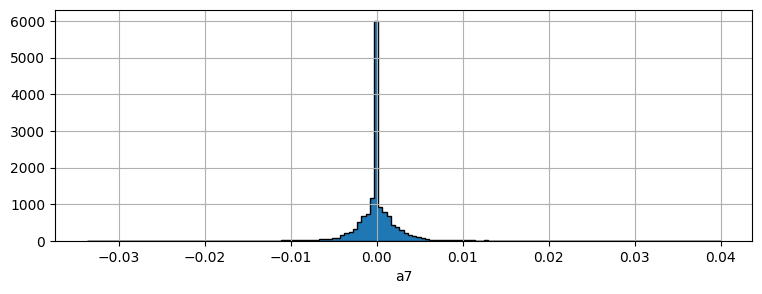

-0.03371463590436712 0.039997985749528384


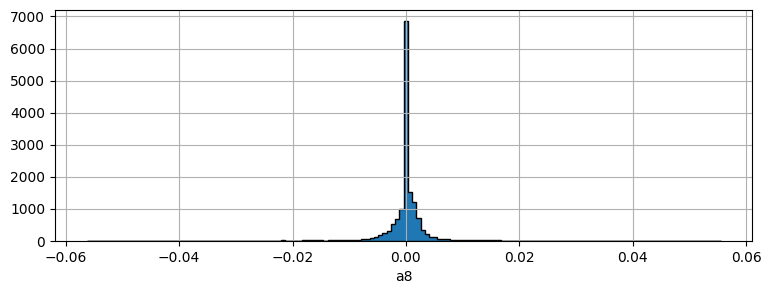

-0.05631792219837408 0.05549390177718022


In [23]:
for i in range(len(da_T)):
    plt.figure(figsize=(9,3))
    plt.hist(da_T[i], edgecolor = 'black',
#              bins = int((max(da_T[i])-min(da_T[i]))/0.001))
              bins = 150, histtype = 'stepfilled')
    plt.xlabel('a %i')
#     plt.ylabel(' ')
    plt.grid()
    plt.show()
    
    print(da_T[i].min(), da_T[i].max())

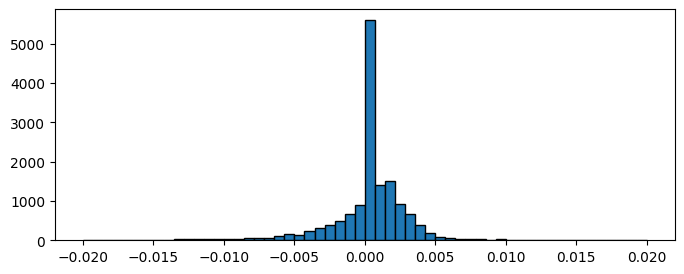

0.004357393921244938

In [9]:
plt.figure(figsize=(8,3))
plt.hist(da_T[0], edgecolor = 'black',
         bins = int((max(da_T[0])-min(da_T[0]))/0.002), range=(-0.02, 0.02))
#     plt.ylabel(' ')

plt.show()

da_T[0].std()

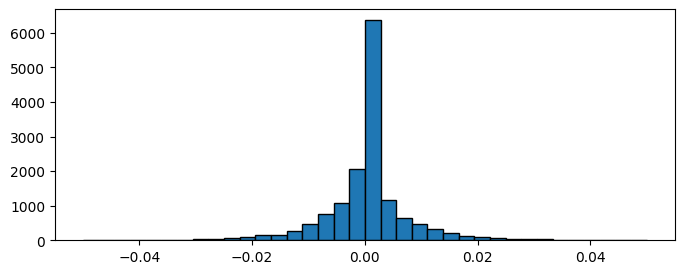

0.010484814547493665

In [10]:
plt.figure(figsize=(8,3))
plt.hist(da_T[1], edgecolor = 'black',
         bins = int((max(da_T[1])-min(da_T[1]))/0.01), range=(-0.05, 0.05))

#     plt.ylabel(' ')

plt.show()

da_T[1].std()

In [31]:
time_step = 0.001
n_steps = 1500000

m0 = MoehlisFaisstEckhardtModel(Re, Lx, Lz, [0,0])

test0 = generate_trajectory(m0, time_step, n_steps)

354.69534254074097 seconds


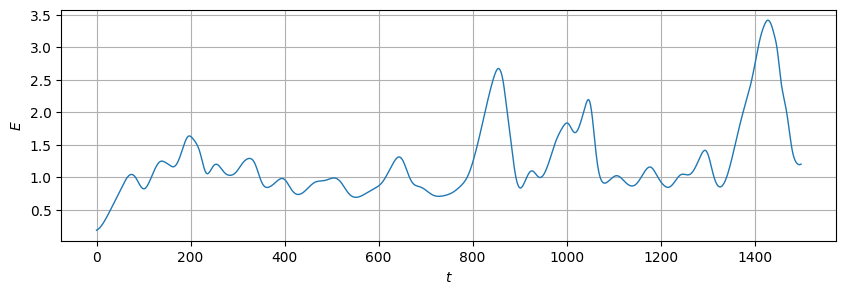

In [32]:
plt.figure(figsize=(10,3))
show_energy(test0, None)
plt.grid()
plt.show()

In [39]:
time_step = 0.001
n_steps = 15000000

m1 = MoehlisFaisstEckhardtModel(Re, Lx, Lz, [0.005, 0.02])

test1 = generate_trajectory(m1, time_step, n_steps)
np.savetxt('ad_test1.txt', test1)

3373.2197201251984 seconds


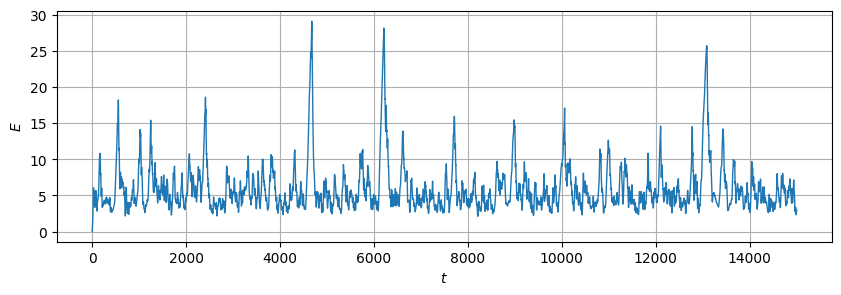

In [40]:
plt.figure(figsize=(10,3))
show_energy(test1, None)
plt.grid()
plt.show()

In [63]:
control_dim = 2
control_range = [[-0.005, 0.005], [-0.02, 0.02]]

def get_action(control_dim, control_range):
    control = np.zeros(control_dim) 
    for i in range(control_dim):
        control[i] = np.random.uniform(control_range[i][0], control_range[i][1])
    return(control)

In [42]:
time_step = 0.001
n_steps = 15000000

m2 = MoehlisFaisstEckhardtModel(Re, Lx, Lz, control)

test2 = generate_trajectory(m2, time_step, n_steps)
np.savetxt('ad_test2.txt', test2)

3228.9066343307495 seconds


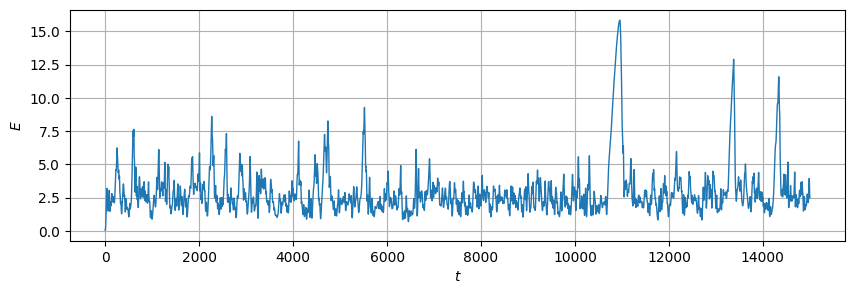

In [43]:
plt.figure(figsize=(10,3))
show_energy(test2, None)
plt.grid()
plt.show()

In [44]:
print(control)

[ 0.00094879 -0.0147436 ]


3209.5830850601196 seconds


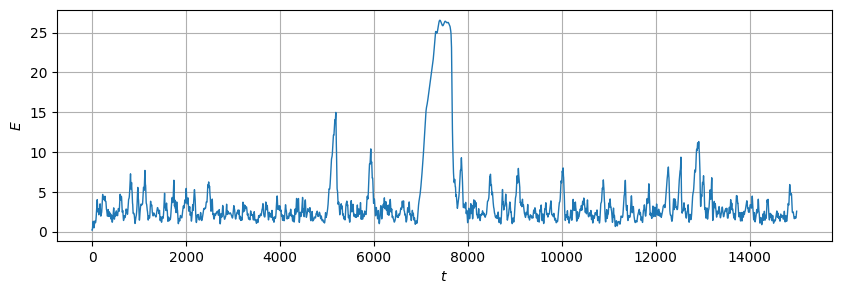

[ 0.00094879 -0.0147436 ]


In [45]:
m3 = MoehlisFaisstEckhardtModel(Re, Lx, Lz, control)

test3 = generate_trajectory(m3, time_step, n_steps)
np.savetxt('ad_test3.txt', test3)

plt.figure(figsize=(10,3))
show_energy(test3, None)
plt.grid()
plt.show()

print(control)

3209.6576261520386 seconds


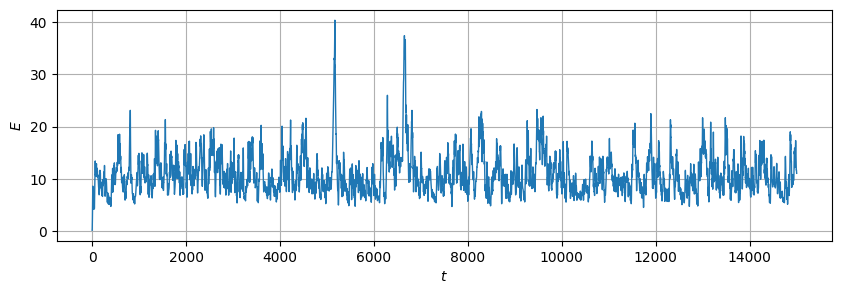

In [46]:
m4 = MoehlisFaisstEckhardtModel(Re, Lx, Lz, [0.005, -0.02])

test4 = generate_trajectory(m4, time_step, n_steps)
np.savetxt('ad_test4.txt', test4)

plt.figure(figsize=(10,3))
show_energy(test4, None)
plt.grid()
plt.show()

# print(control)

3297.1758213043213 seconds


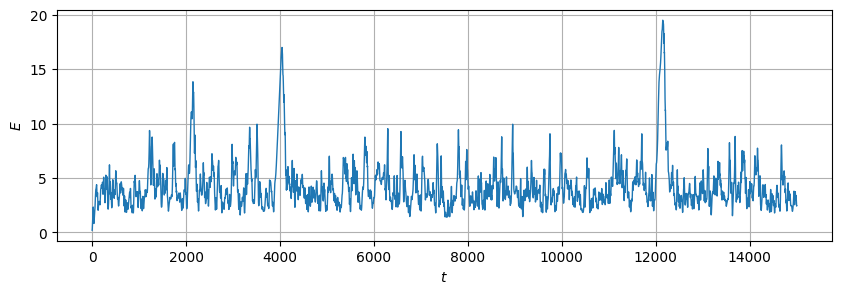

In [47]:
m5 = MoehlisFaisstEckhardtModel(Re, Lx, Lz, [0.003, -0.02])

test5 = generate_trajectory(m5, time_step, n_steps)
np.savetxt('ad_test5.txt', test5)

plt.figure(figsize=(10,3))
show_energy(test5, None)
plt.grid()
plt.show()

3297.922283411026 seconds


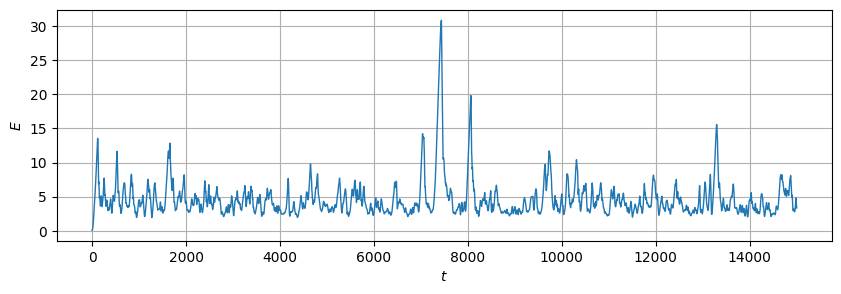

In [48]:
m6 = MoehlisFaisstEckhardtModel(Re, Lx, Lz, [0.005, -0.005])

test6 = generate_trajectory(m6, time_step, n_steps)
np.savetxt('ad_test6.txt', test6)

plt.figure(figsize=(10,3))
show_energy(test6, None)
plt.grid()
plt.show()

3285.459352493286 seconds


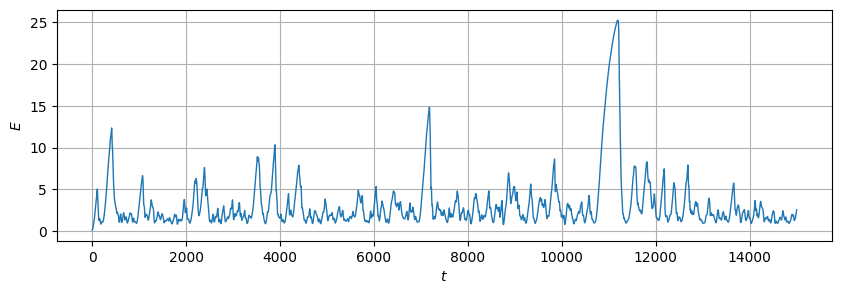

In [49]:
m7 = MoehlisFaisstEckhardtModel(Re, Lx, Lz, [0.001, -0.005])

test7 = generate_trajectory(m7, time_step, n_steps)
np.savetxt('ad_test7.txt', test7)

plt.figure(figsize=(10,3))
show_energy(test7, None)
plt.grid()
plt.show()

3259.7022902965546 seconds


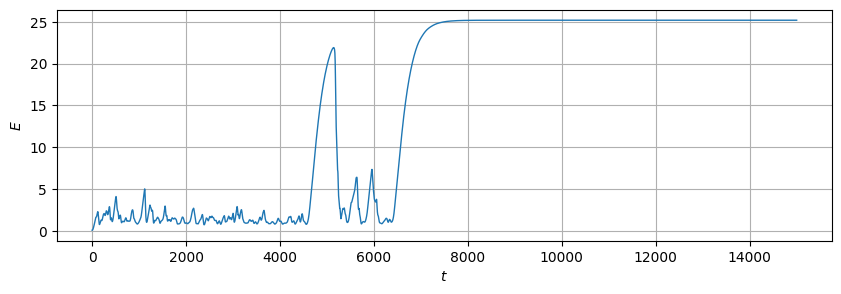

In [50]:
m8 = MoehlisFaisstEckhardtModel(Re, Lx, Lz, [0.0005, -0.001])

test8 = generate_trajectory(m8, time_step, n_steps)
np.savetxt('ad_test8.txt', test8)

plt.figure(figsize=(10,3))
show_energy(test8, None)
plt.grid()
plt.show()

3468.98419380188 seconds


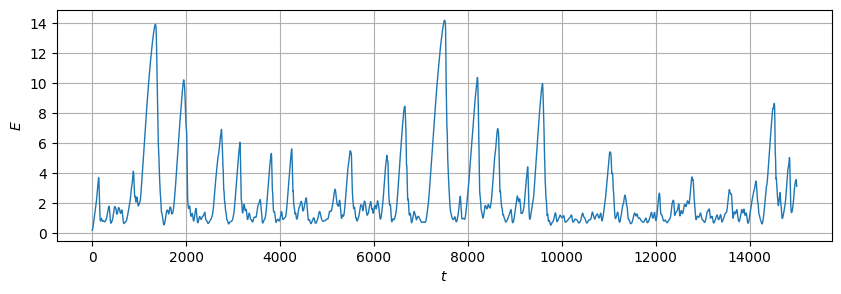

In [56]:
m9 = MoehlisFaisstEckhardtModel(Re, Lx, Lz, [-0.0001, 0.0005])

test9 = generate_trajectory(m9, time_step, n_steps)
np.savetxt('ad_test9.txt', test9)

plt.figure(figsize=(10,3))
ek = show_energy(test9, None)
plt.grid()
plt.show()

In [54]:
ek[10000]

21.593472851376188

In [57]:
time_step = 0.001
n_steps = 10000000

2563.485714673996 seconds
[ 0.16536125  0.16305425  0.16227067 ... 19.9139678  19.91397485
 19.91397418]


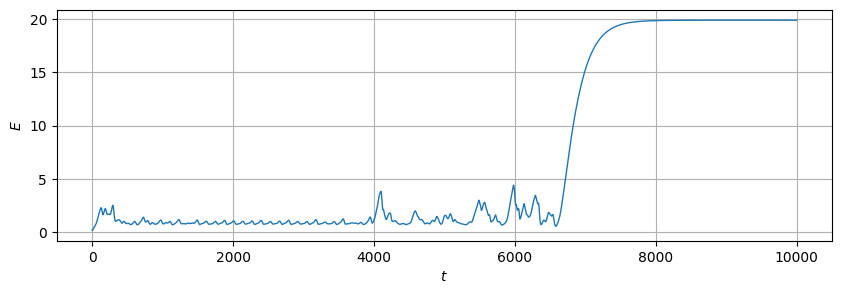

2197.8172783851624 seconds
[0.10090715 0.1034367  0.10720601 ... 1.68511422 1.67833007 1.67580406]


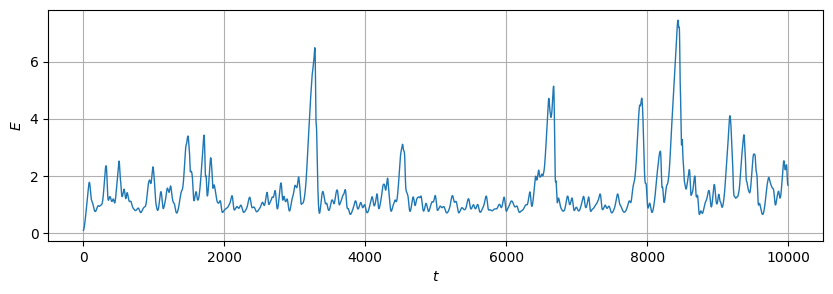

2238.6190869808197 seconds
[ 0.08332289  0.08789853  0.09370186 ... 21.15360149 21.15360043
 21.15360043]


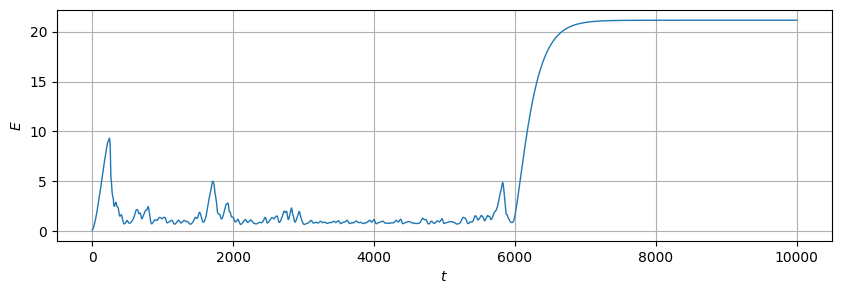

2281.023426055908 seconds
[0.09920713 0.10267175 0.10763765 ... 0.78770421 0.78402976 0.78072797]


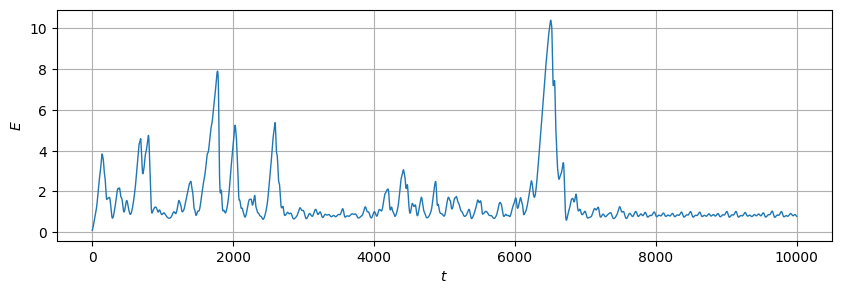

2374.601721048355 seconds
[ 0.17878297  0.18078148  0.18391097 ... 21.14831106 21.14831106
 21.14831106]


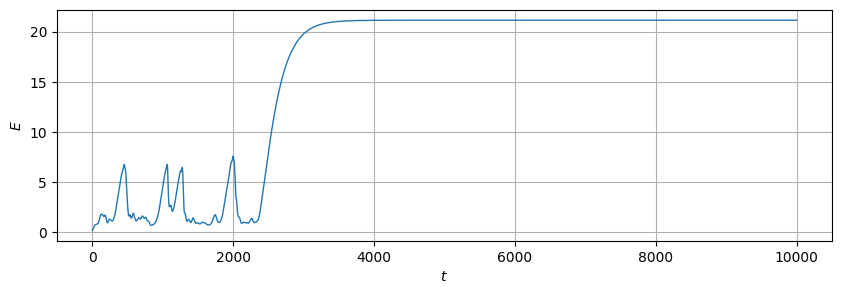

2466.7623143196106 seconds
[0.16007244 0.16217663 0.1659571  ... 0.84895192 0.86309534 0.8785348 ]


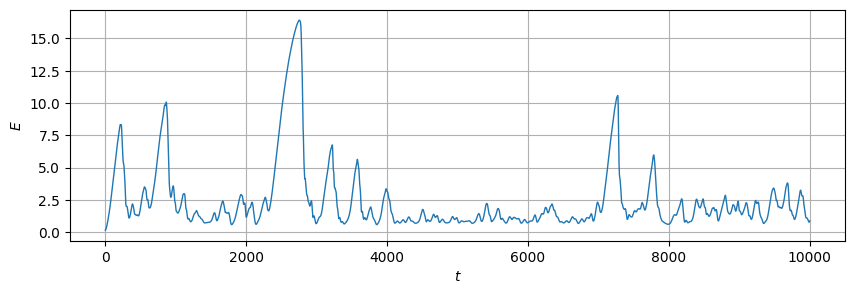

In [60]:
action = [[-0.0001, -0.0005], [0.0001, 0.0005], [0.00005, 0.0002], [-0.00005, -0.0002], [0.00005, 0.00001], [0.00001, 0.0002]]

for i in range(6):
    m10 = MoehlisFaisstEckhardtModel(Re, Lx, Lz, action[i])

    test10 = generate_trajectory(m10, time_step, n_steps)
    np.savetxt('ad_test10.txt', test10)

    plt.figure(figsize=(10,3))
    ek = show_energy(test10, None)
    print(ek)
    plt.grid()
    plt.show()

[-1.93457447e-06  8.54607111e-07]
2231.6345195770264 seconds
0.8999750696932384


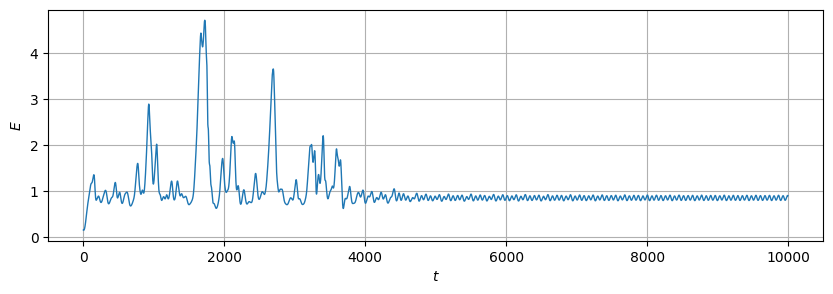

[6.10645596e-06 6.02777092e-06]
2148.524901151657 seconds
2.1704648895615333


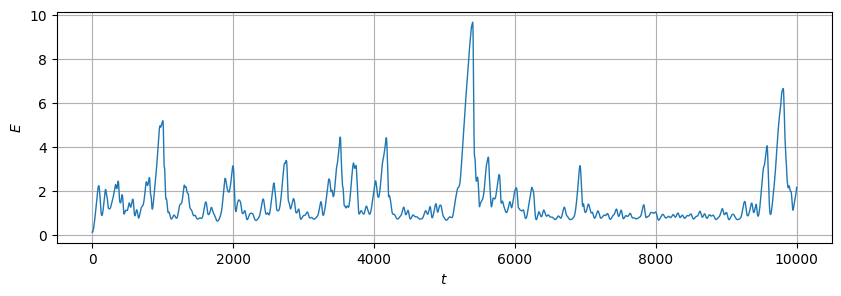

[-7.21703171e-06  6.52245807e-06]
2121.8162291049957 seconds
20.6655964928367


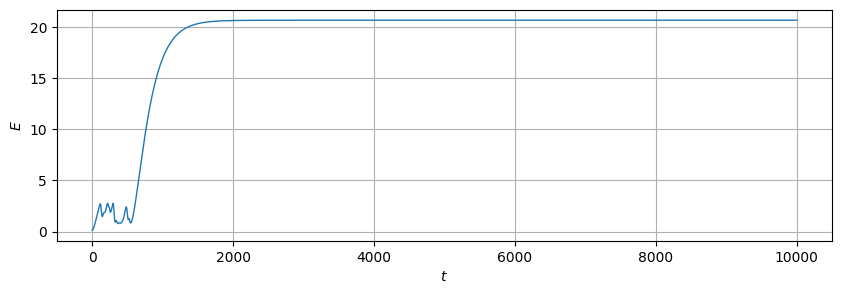

[ 7.81272350e-06 -6.61896359e-06]
2181.36585021019 seconds
0.8338455851102203


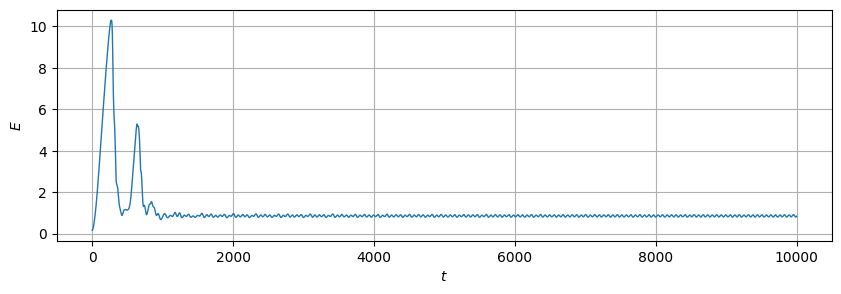

[ 9.56790388e-06 -3.54585426e-06]
2159.464388370514 seconds
20.806619317104072


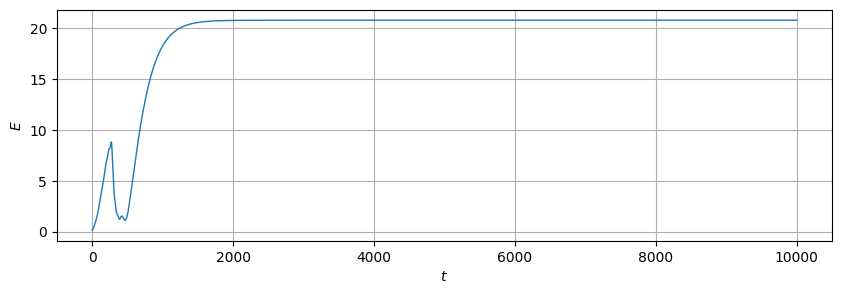

[-8.39813071e-06  3.12884593e-08]


KeyboardInterrupt: 

In [77]:
control_dim = 2
control_range = [[-0.00001, 0.00001], [-0.00001, 0.00001]]

for i in range(10):
    action = get_action(control_dim, control_range)
    print(action)
    
    m11 = MoehlisFaisstEckhardtModel(Re, Lx, Lz, action)

    test11 = generate_trajectory(m11, time_step, n_steps)
    np.savetxt('ad_test11.txt', test11)

    plt.figure(figsize=(10,3))
    ek = show_energy(test11, None)
    print(ek[-1])
    plt.grid()
    plt.show()

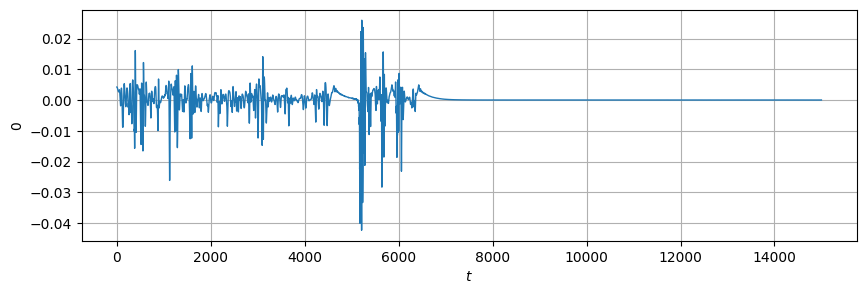

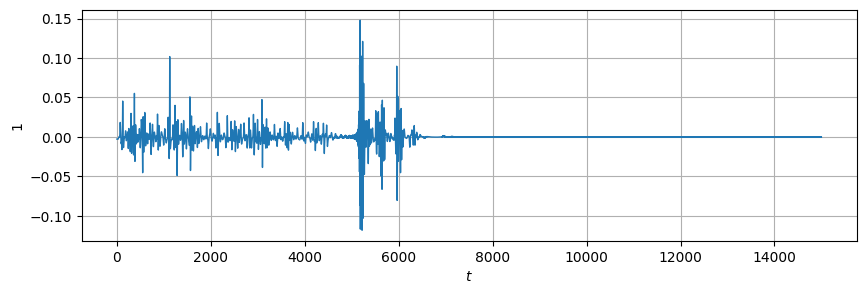

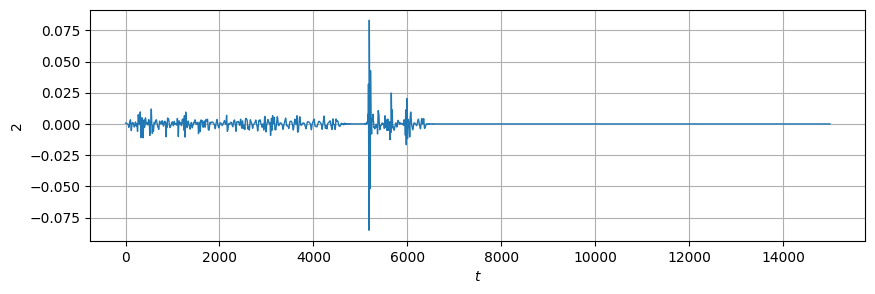

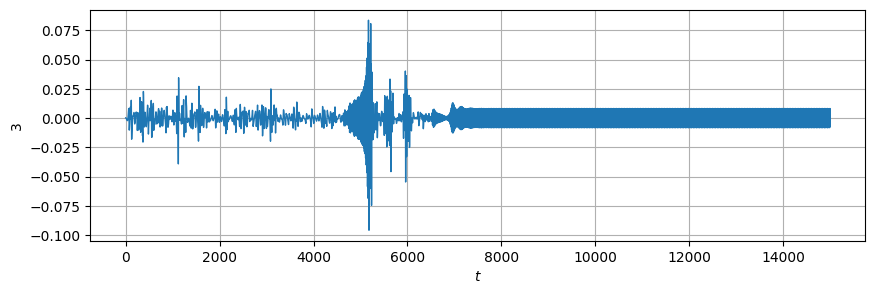

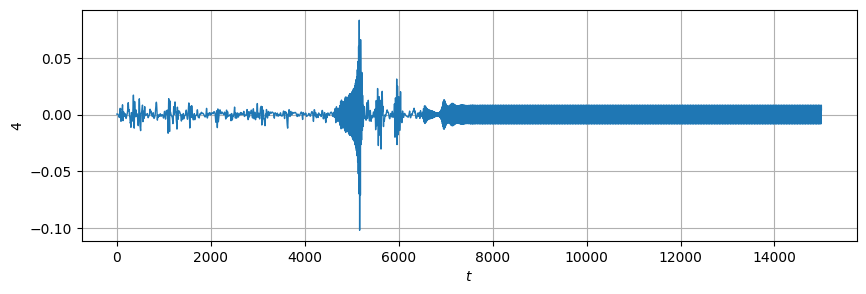

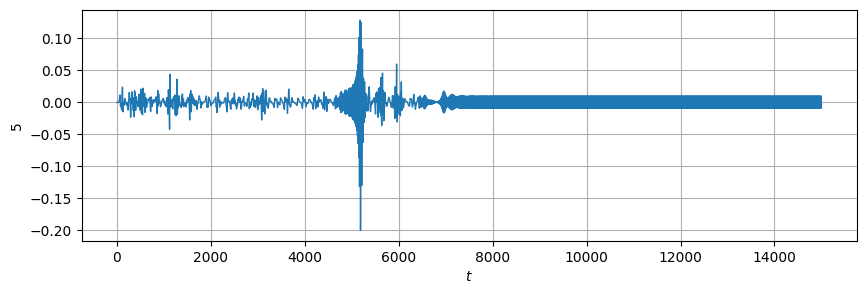

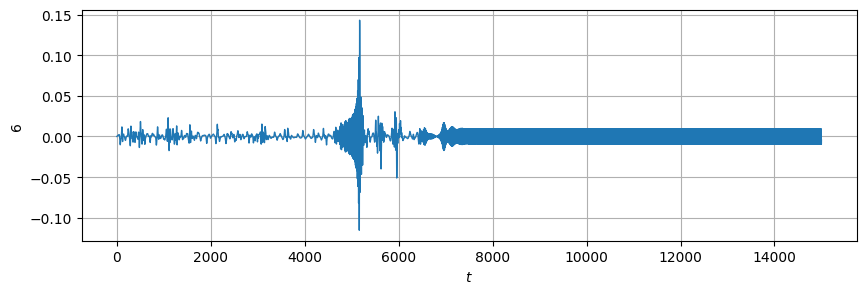

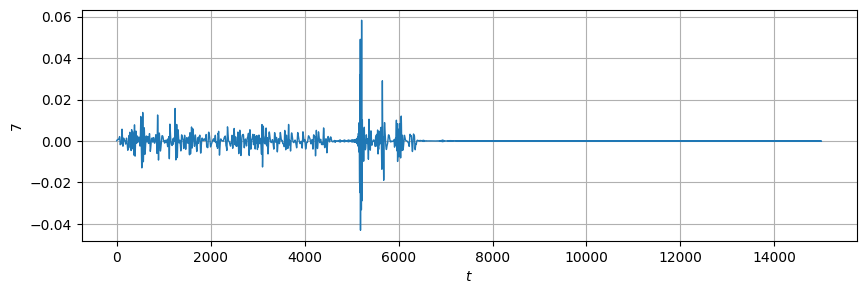

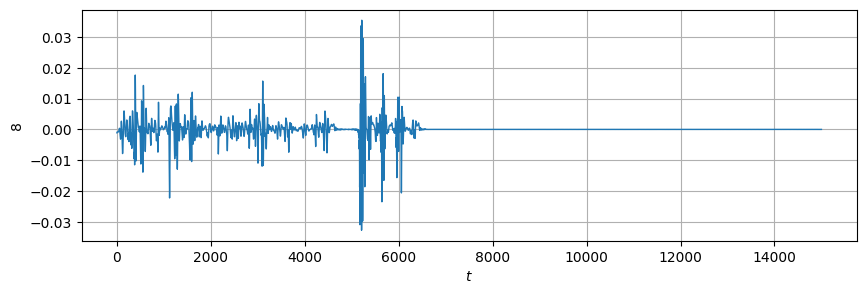

In [90]:
# for i in range(1, 12):
i=8
act = [0.0005, -0.001]

model = MoehlisFaisstEckhardtModel(Re, Lx, Lz, act)

trajectory = np.loadtxt(f'ad_test{i}.txt')

da = np.zeros_like(trajectory)
for i in range(len(trajectory)):
    da[i] = model.f(trajectory[i])

da_T = da.T
for i in range(len(da_T)):
    plt.figure(figsize=(10,3))
    plt.plot(np.arange(len(trajectory)), da_T[i],  linewidth=1, markersize = 0.5)
    plt.xlabel("$t$")
    plt.ylabel(i)
    plt.grid()
    plt.show()

20.806619317104072


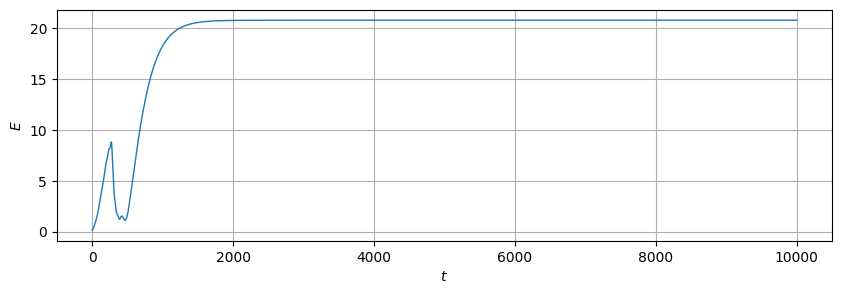

In [85]:
plt.figure(figsize=(10,3))
ek = show_energy(trajectory, None)
print(ek[-1])
plt.grid()
plt.show()